# Modeling 

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import functions  # Import file with functions created 

pd.set_option('display.max_rows', None)

In [2]:
# Import the data
df = pd.read_csv('../data/paper_dataset.csv')
df.head()

,subject_id,gender,anchor_age,lengths_of_1st_admission,lengths_of_2nd_admission,0.45% sodium chloride Sum,1/2 ns Sum,allopurinol Sum,alprazolam Sum,amiodarone Sum,...,Pure hypercholesterolemia,Tobacco use disorder,Type 2 diabetes mellitus with diabetic chronic kidney disease,Type 2 diabetes mellitus without complications,Unspecified acquired hypothyroidism,"Unspecified asthma, uncomplicated",Unspecified atrial fibrillation,Unspecified essential hypertension,Unspecified place or not applicable,"Urinary tract infection, site not specified"
0,10000084,M,72,4,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,10000117,F,48,0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,10000883,M,20,7,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,10001217,F,55,6,1,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
4,10001877,M,89,1,1,0.0,0.0,200.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df['lengths_of_2nd_admission'].nunique()

2

In [4]:
df.shape

(31386, 203)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31386 entries, 0 to 31385
Columns: 203 entries, subject_id to Urinary tract infection, site not specified
dtypes: float64(136), int64(66), object(1)
memory usage: 48.6+ MB


In [6]:
df.subject_id.nunique()

31386

In [7]:
df.describe()

,subject_id,anchor_age,lengths_of_1st_admission,lengths_of_2nd_admission,0.45% sodium chloride Sum,1/2 ns Sum,allopurinol Sum,alprazolam Sum,amiodarone Sum,amlodipine Sum,...,Pure hypercholesterolemia,Tobacco use disorder,Type 2 diabetes mellitus with diabetic chronic kidney disease,Type 2 diabetes mellitus without complications,Unspecified acquired hypothyroidism,"Unspecified asthma, uncomplicated",Unspecified atrial fibrillation,Unspecified essential hypertension,Unspecified place or not applicable,"Urinary tract infection, site not specified"
count,3.138600e+04,31386.000000,31386.000000,31386.000000,31386.00000,31386.000000,31386.000000,31386.000000,31386.000000,31386.000000,...,31386.000000,31386.000000,31386.000000,31386.000000,31386.000000,31386.000000,31386.000000,31386.000000,31386.000000,31386.000000
mean,1.502032e+07,57.688109,4.057287,0.478621,85.14943,84.583891,14.704805,0.035645,81.454964,1.851821,...,0.072293,0.085962,0.024565,0.062066,0.080099,0.046103,0.050787,0.320461,0.057988,0.117887
std,2.885320e+06,19.757351,6.501747,0.499551,423.22597,385.546725,87.780864,0.347367,476.849420,5.883659,...,0.258977,0.280312,0.154798,0.241279,0.271451,0.209712,0.219566,0.466661,0.233724,0.322479
min,1.000008e+07,18.000000,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.250450e+07,42.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.503943e+07,60.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.751198e+07,73.000000,5.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.999984e+07,91.000000,249.000000,1.000000,15000.00000,10000.000000,2800.000000,20.000000,9500.000000,115.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

subject_id                                                                                                                         0
gender                                                                                                                             0
anchor_age                                                                                                                         0
lengths_of_1st_admission                                                                                                           0
lengths_of_2nd_admission                                                                                                           0
0.45% sodium chloride Sum                                                                                                          0
1/2 ns Sum                                                                                                                         0
allopurinol Sum                                                      

In [9]:
# Clean the dataset: remove null values, duplicates, and instances where LOS 1 < 0 (meaning that they died before reaching the hospital)
df = functions.clean_df(df)

In [10]:
# cleaned dataframe shape
df.shape

(31342, 203)

### MODELS

#### Encode categorical variables

In [11]:
# Convert gender to binary
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

#### Data

In [12]:
# Data X and y
y = df['lengths_of_2nd_admission']
X = df.drop(columns=['subject_id','lengths_of_2nd_admission'])

In [13]:
y.value_counts()

lengths_of_2nd_admission
0    16332
1    15010
Name: count, dtype: int64

In [14]:
# split: 50% train, 25% validation/calibration, 25% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [15]:
# Scale anchor_age and length_of_1st_admission (fit on train, transform validation and test)
scaler = MinMaxScaler()
X_train[['anchor_age']] = scaler.fit_transform(X_train[['anchor_age']])
X_val[['anchor_age']] = scaler.transform(X_val[['anchor_age']])
X_test[['anchor_age']] = scaler.transform(X_test[['anchor_age']])

X_train[['lengths_of_1st_admission']] = scaler.fit_transform(X_train[['lengths_of_1st_admission']])
X_val[['lengths_of_1st_admission']] = scaler.transform(X_val[['lengths_of_1st_admission']])
X_test[['lengths_of_1st_admission']] = scaler.transform(X_test[['lengths_of_1st_admission']])

X_train.head(2)

,gender,anchor_age,lengths_of_1st_admission,0.45% sodium chloride Sum,1/2 ns Sum,allopurinol Sum,alprazolam Sum,amiodarone Sum,amlodipine Sum,aspirin Sum,...,Pure hypercholesterolemia,Tobacco use disorder,Type 2 diabetes mellitus with diabetic chronic kidney disease,Type 2 diabetes mellitus without complications,Unspecified acquired hypothyroidism,"Unspecified asthma, uncomplicated",Unspecified atrial fibrillation,Unspecified essential hypertension,Unspecified place or not applicable,"Urinary tract infection, site not specified"
3995,1,0.821918,0.04065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
16236,0,0.863014,0.02439,1000.0,0.0,0.0,0.0,0.0,15.0,81.0,...,0,0,0,0,1,0,0,1,0,1


In [16]:
# Scale prescriptions dosages columns (fit on train, transform validation and test)
columns_to_scale = X_train.columns[3:139]
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_val[columns_to_scale] = scaler.transform(X_val[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

X_train.head(2)

,gender,anchor_age,lengths_of_1st_admission,0.45% sodium chloride Sum,1/2 ns Sum,allopurinol Sum,alprazolam Sum,amiodarone Sum,amlodipine Sum,aspirin Sum,...,Pure hypercholesterolemia,Tobacco use disorder,Type 2 diabetes mellitus with diabetic chronic kidney disease,Type 2 diabetes mellitus without complications,Unspecified acquired hypothyroidism,"Unspecified asthma, uncomplicated",Unspecified atrial fibrillation,Unspecified essential hypertension,Unspecified place or not applicable,"Urinary tract infection, site not specified"
3995,1,0.821918,0.04065,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,1
16236,0,0.863014,0.02439,0.071429,0.0,0.0,0.0,0.0,0.214286,0.029867,...,0,0,0,0,1,0,0,1,0,1


In [17]:
X_train.describe()

,gender,anchor_age,lengths_of_1st_admission,0.45% sodium chloride Sum,1/2 ns Sum,allopurinol Sum,alprazolam Sum,amiodarone Sum,amlodipine Sum,aspirin Sum,...,Pure hypercholesterolemia,Tobacco use disorder,Type 2 diabetes mellitus with diabetic chronic kidney disease,Type 2 diabetes mellitus without complications,Unspecified acquired hypothyroidism,"Unspecified asthma, uncomplicated",Unspecified atrial fibrillation,Unspecified essential hypertension,Unspecified place or not applicable,"Urinary tract infection, site not specified"
count,15671.000000,15671.000000,15671.000000,15671.000000,15671.000000,15671.000000,15671.000000,15671.000000,15671.000000,15671.000000,...,15671.000000,15671.000000,15671.000000,15671.000000,15671.000000,15671.000000,15671.000000,15671.000000,15671.000000,15671.000000
mean,0.435965,0.542839,0.033039,0.005964,0.009746,0.006796,0.004065,0.008846,0.026497,0.039030,...,0.070959,0.084679,0.023674,0.064131,0.079127,0.046391,0.051433,0.317784,0.057431,0.115628
std,0.495898,0.271761,0.050630,0.029243,0.044533,0.041043,0.037920,0.051929,0.083300,0.076578,...,0.256765,0.278412,0.152037,0.244994,0.269946,0.210338,0.220885,0.465630,0.232672,0.319788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.328767,0.008130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.561644,0.016260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.753425,0.040650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059735,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# DataFrame to store performance results -- the index will be the name of the model and the (un)calibrated model on validation/test sets
eval_results = pd.DataFrame(columns=[
    'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Brier Score Loss', 'AUC (ROC)', 'AUC (PRC)', 'ECE'
])


In [19]:
# import functions to train the models and to evaluate the performance
from functions import model_train, model_evaluation 

In [20]:
# Results dictionary to save the models results for easier comparison 
results = {}

# Hyperparameters for each model (according to paper followed)
param_grids = {
    "Logistic Regression": {"C": [100, 10, 1.0, 0.1, 0.01]},
    "Random Forest": {"n_estimators": [10, 100, 1000], "max_features": ['log2', 'sqrt'], "min_samples_split": [2, 5, 10]},
    "Support Vector Machine": {"C": [1000, 100, 10, 1.0, 0.1], "gamma": [1, 0.1, 0.01, 0.001, 0.0001]},
    "AdaBoost": {"learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.0], "n_estimators": [10, 100, 1000]},
    "XGBoost": {"learning_rate": [0.1, 0.2, 0.3], "n_estimators": [100, 200, 300, 400, 500], "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    "Naive Bayes": {'var_smoothing': np.logspace(-9, 0, 10)}
}

### Evaluation

Train the models with GridSearchCV as described in the paper. 

#### 1. Logistic Regression

Classification report:
               precision    recall  f1-score   support

           0       0.68      0.80      0.74      4068
           1       0.73      0.60      0.66      3767

    accuracy                           0.70      7835
   macro avg       0.71      0.70      0.70      7835
weighted avg       0.71      0.70      0.70      7835



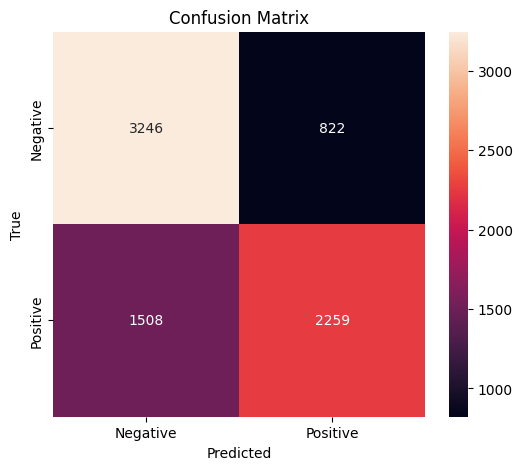

Brier Score Loss: 0.195
AUROC: 0.699
AUPRC: 0.764


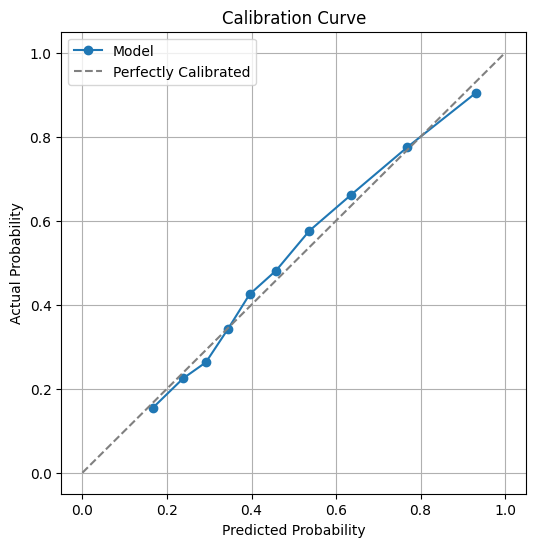

Best Parameters: {'C': 100}


/var/folders/tx/69fsckhn3lgch43zclrrszxw0000gn/T/ipykernel_83386/1865944266.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eval_results = pd.concat([eval_results, pd.DataFrame([metrics], index=['Logistic Regression - uncalibrated train'])])


In [21]:
# Train Logistic Regression -- get the results and metrics from the model
results['Logistic Regression'], metrics = model_train(LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42), param_grids['Logistic Regression'], X_train, X_val, y_train, y_val)

# Add the evaluation results to the dataframe
eval_results = pd.concat([eval_results, pd.DataFrame([metrics], index=['Logistic Regression - uncalibrated train'])])
print(f"Best Parameters: {results['Logistic Regression']['best_params']}")

Classification report:
               precision    recall  f1-score   support

           0       0.68      0.80      0.73      4060
           1       0.73      0.59      0.65      3776

    accuracy                           0.70      7836
   macro avg       0.70      0.69      0.69      7836
weighted avg       0.70      0.70      0.69      7836



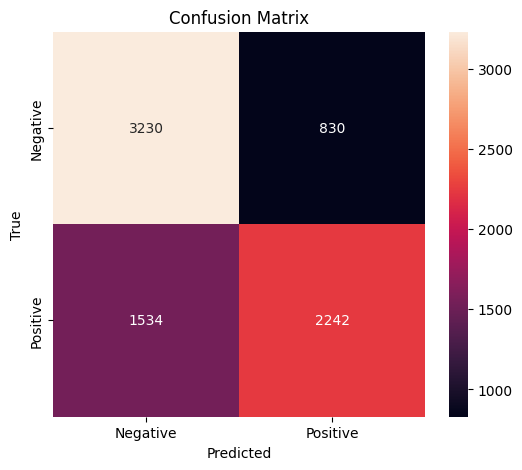

Brier Score Loss: 0.198
AUROC: 0.695
AUPRC: 0.758


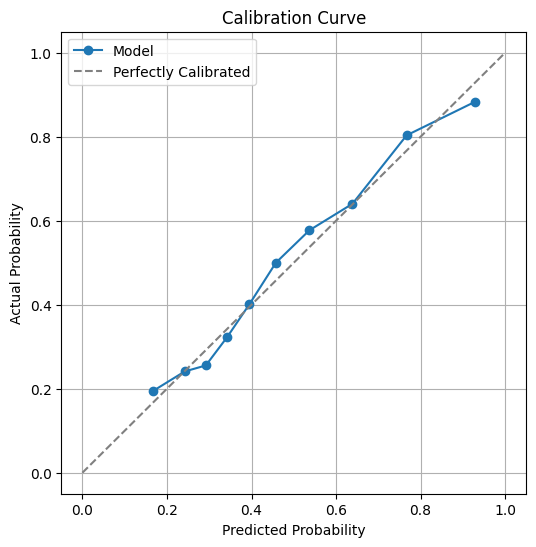

In [22]:
# Test the logistic regression on the test set
lr = results['Logistic Regression']['model']
y_preds_lr = lr.predict(X_test)
y_probs_lr = lr.predict_proba(X_test)[:,1]

# Save the results in the eval_results dataframe 
metrics_lr = model_evaluation(y_test, y_preds_lr, y_probs_lr)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_lr], index=['Logistic Regression - uncalibrated test'])])


#### 2. Random Forest

Classification report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74      4068
           1       0.71      0.71      0.71      3767

    accuracy                           0.73      7835
   macro avg       0.72      0.72      0.72      7835
weighted avg       0.73      0.73      0.73      7835



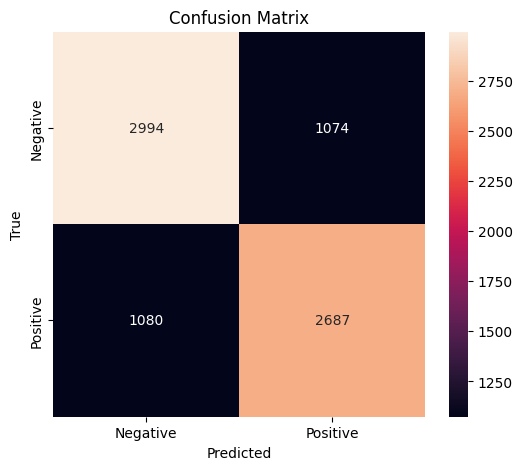

Brier Score Loss: 0.186
AUROC: 0.725
AUPRC: 0.784


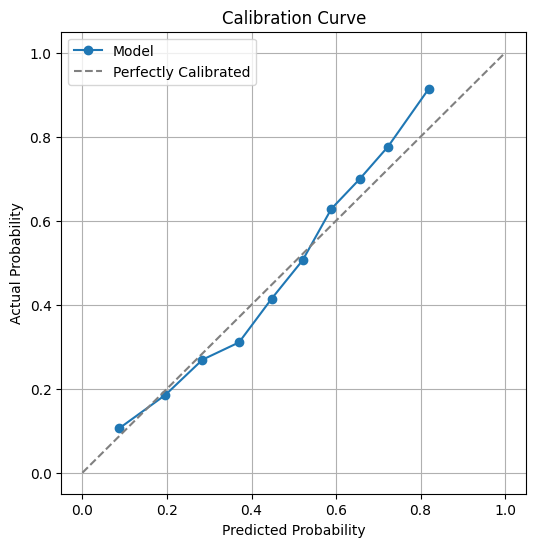

Best Parameters: {'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 1000}


In [23]:
# Train Random Forest
results['Random Forest'], metrics  = model_train(RandomForestClassifier(random_state=42), param_grids['Random Forest'], X_train, X_val, y_train, y_val)

# Add the evaluation results to the dataframe
eval_results = pd.concat([eval_results, pd.DataFrame([metrics], index=['Random Forest - uncalibrated train'])])
print(f"Best Parameters: {results['Random Forest']['best_params']}")


Classification report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      4060
           1       0.72      0.72      0.72      3776

    accuracy                           0.73      7836
   macro avg       0.73      0.73      0.73      7836
weighted avg       0.73      0.73      0.73      7836



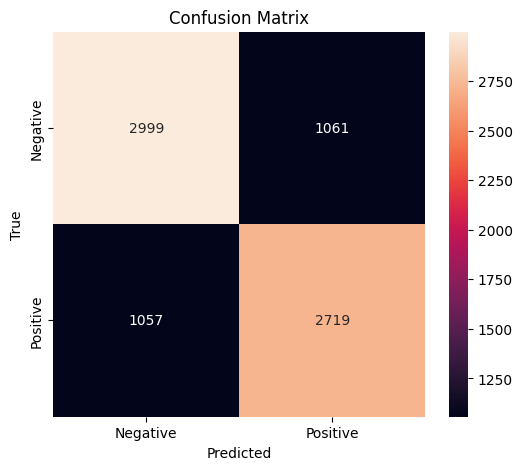

Brier Score Loss: 0.183
AUROC: 0.729
AUPRC: 0.798


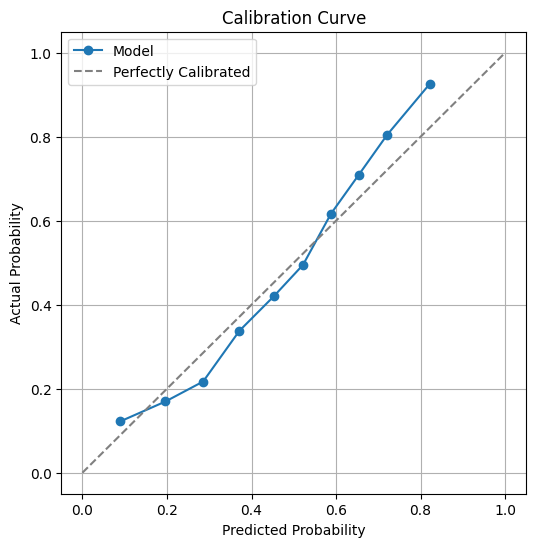

In [24]:
# Test the random forest on the test set
rf = results['Random Forest']['model']
y_preds_rf = rf.predict(X_test)
y_probs_rf = rf.predict_proba(X_test)[:,1]

# Save the results in eval_results
metrics_rf = model_evaluation(y_test, y_preds_rf, y_probs_rf)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_rf], index=['Random Forest - uncalibrated test'])])

#### 3. XGboost

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      4068
           1       0.74      0.67      0.70      3767

    accuracy                           0.73      7835
   macro avg       0.73      0.73      0.73      7835
weighted avg       0.73      0.73      0.73      7835



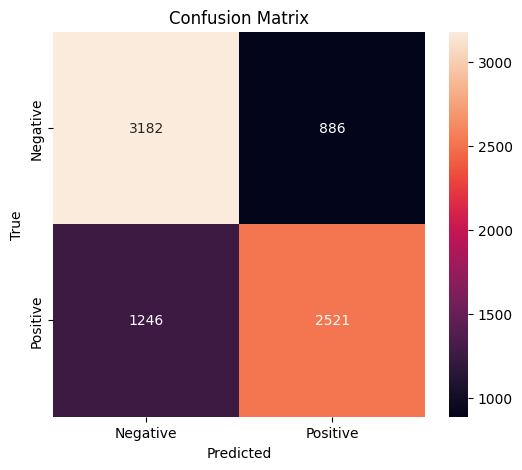

Brier Score Loss: 0.181
AUROC: 0.726
AUPRC: 0.803


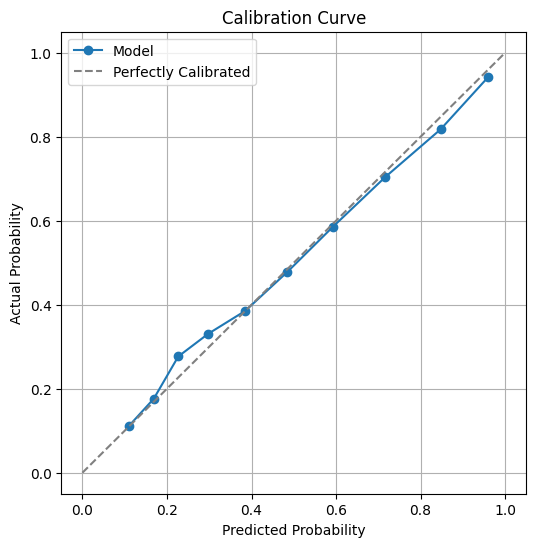

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500}


In [25]:
# Train XGBoost
results['XGBoost'], metrics  = model_train(XGBClassifier(objective="binary:logistic", eval_metric='logloss', random_state=42), param_grids['XGBoost'], X_train, X_val, y_train, y_val)

# Save the results in the eval_results df
eval_results = pd.concat([eval_results, pd.DataFrame([metrics], index=['XGBoost - uncalibrated train'])])
print(f"Best Parameters: {results['XGBoost']['best_params']}")


Classification report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      4060
           1       0.75      0.67      0.71      3776

    accuracy                           0.73      7836
   macro avg       0.74      0.73      0.73      7836
weighted avg       0.73      0.73      0.73      7836



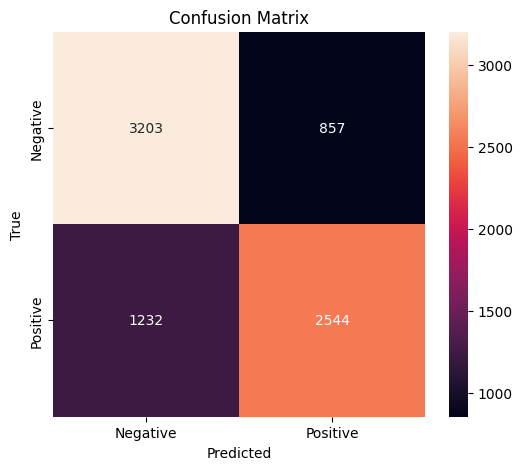

Brier Score Loss: 0.179
AUROC: 0.731
AUPRC: 0.806


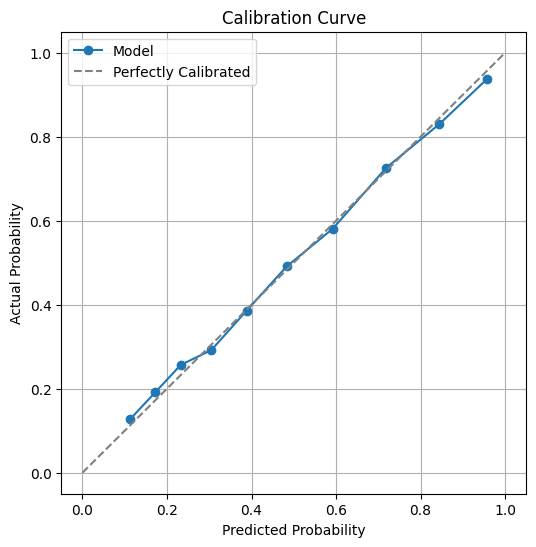

In [26]:
# Test the XGBoost performance on the test set
xgb = results['XGBoost']['model']
y_preds_xgb = xgb.predict(X_test)
y_probs_xgb = xgb.predict_proba(X_test)[:,1]

# Save the results in the eval_results dataframe
metrics_xgb = model_evaluation(y_test, y_preds_xgb, y_probs_xgb)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_xgb], index=['XGBoost - uncalibrated test'])])


#### 4. AdaBoost

Classification report:
               precision    recall  f1-score   support

           0       0.68      0.80      0.74      4068
           1       0.73      0.59      0.66      3767

    accuracy                           0.70      7835
   macro avg       0.71      0.70      0.70      7835
weighted avg       0.71      0.70      0.70      7835



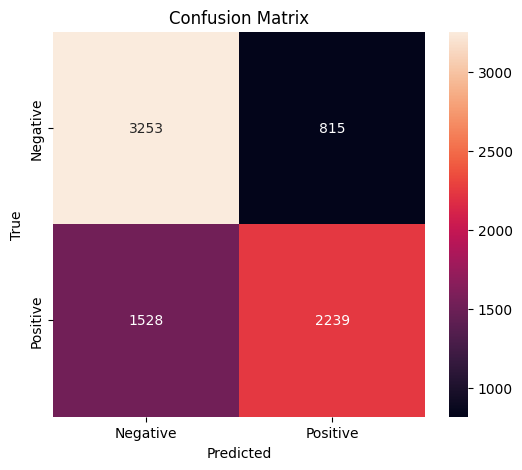

Brier Score Loss: 0.236
AUROC: 0.697
AUPRC: 0.765


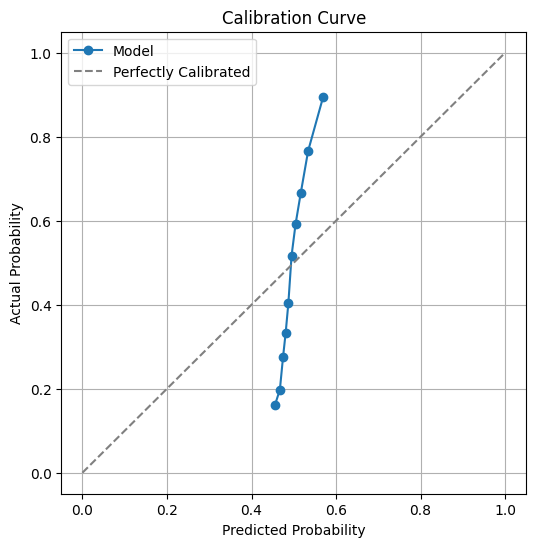

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 1000}


In [27]:
# Train AdaBoost on train/eval set
results['AdaBoost'], metrics  = model_train(AdaBoostClassifier(algorithm="SAMME", random_state=42), param_grids['AdaBoost'], X_train, X_val, y_train, y_val)

# Save the results in the eval_results df
eval_results = pd.concat([eval_results, pd.DataFrame([metrics], index=['AdaBoost - uncalibrated train'])])
print(f"Best Parameters: {results['AdaBoost']['best_params']}")


Classification report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74      4060
           1       0.74      0.61      0.67      3776

    accuracy                           0.71      7836
   macro avg       0.71      0.71      0.70      7836
weighted avg       0.71      0.71      0.71      7836



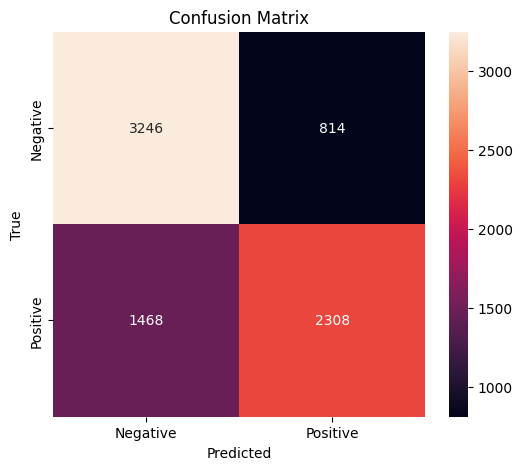

Brier Score Loss: 0.236
AUROC: 0.705
AUPRC: 0.770


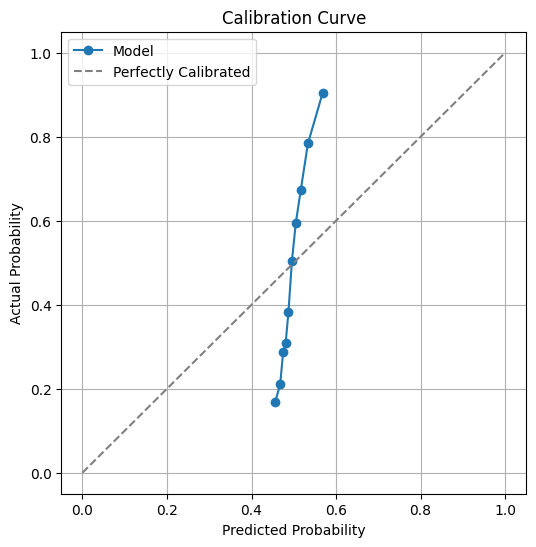

In [28]:
# Test AdaBoost on test set
ab = results['AdaBoost']['model']
y_preds_ab = ab.predict(X_test)
y_probs_ab = ab.predict_proba(X_test)[:,1]

# Add the results to the eval_results dataframe
metrics_ab = model_evaluation(y_test, y_preds_ab, y_probs_ab)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_ab], index=['AdaBoost - uncalibrated test'])])

#### 5. Support Vector Machine

Classification report:
               precision    recall  f1-score   support

           0       0.67      0.82      0.74      4068
           1       0.74      0.56      0.64      3767

    accuracy                           0.70      7835
   macro avg       0.71      0.69      0.69      7835
weighted avg       0.70      0.70      0.69      7835



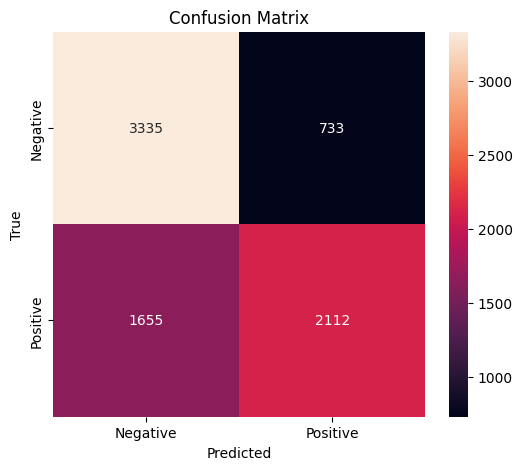

Brier Score Loss: 0.196
AUROC: 0.690
AUPRC: 0.762


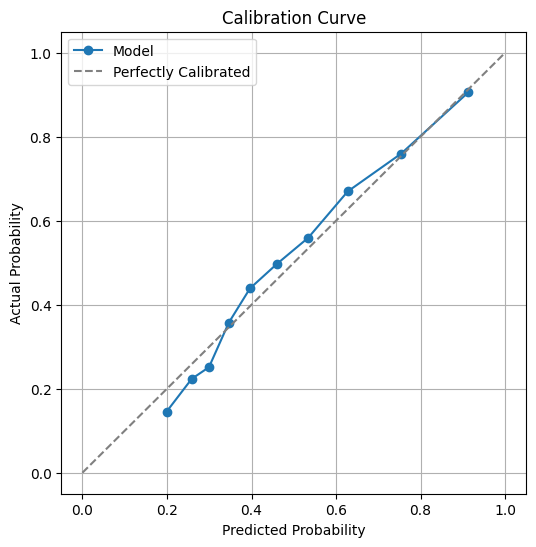

Best Parameters: {'C': 1000, 'gamma': 0.001}


In [29]:
# Train SVC 
results['Support Vector Machine'], metrics  = model_train(SVC(probability=True, random_state=42), param_grids['Support Vector Machine'], X_train, X_val, y_train, y_val)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics], index=['SVM - uncalibrated train'])])
print(f"Best Parameters: {results['Support Vector Machine']['best_params']}")


Classification report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74      4060
           1       0.74      0.61      0.67      3776

    accuracy                           0.71      7836
   macro avg       0.71      0.71      0.70      7836
weighted avg       0.71      0.71      0.71      7836



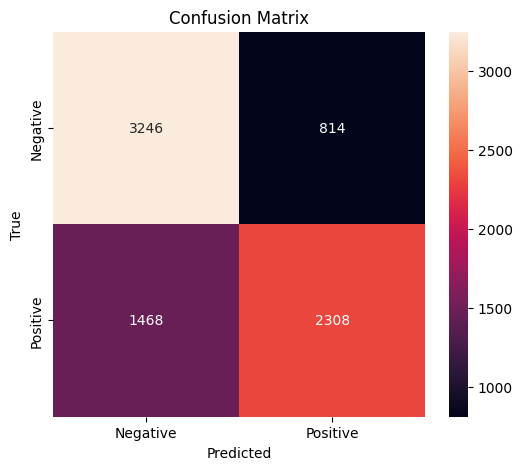

Brier Score Loss: 0.236
AUROC: 0.705
AUPRC: 0.770


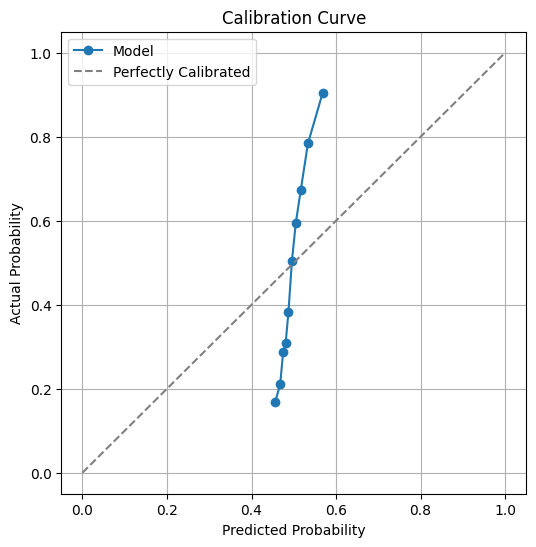

In [30]:
# Test SVC performance on test set
svm = results['Support Vector Machine']['model']
y_preds_svm = svm.predict(X_test)
y_probs_svm = svm.predict_proba(X_test)[:,1]

# Add results to the eval_results dataframe
metrics_svm = model_evaluation(y_test, y_preds_ab, y_probs_ab)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_svm], index=['SVM - uncalibrated test'])])

#### 6. Naive Bayes

Python(91119) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(91120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(91121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(91122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(91123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(91124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(91125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(91126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Classification report:
               precision    recall  f1-score   support

           0       0.62      0.83      0.71      4068
           1       0.71      0.45      0.55      3767

    accuracy                           0.65      7835
   macro avg       0.67      0.64      0.63      7835
weighted avg       0.67      0.65      0.64      7835



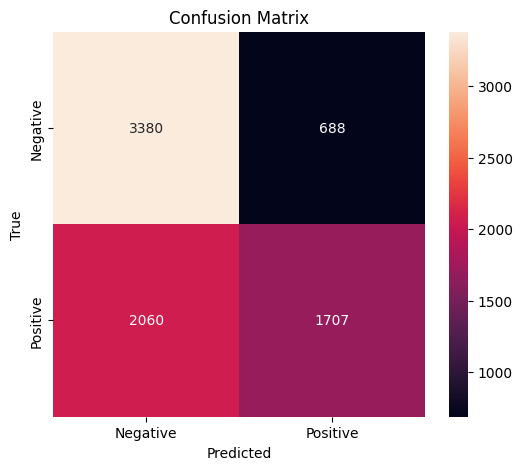

Brier Score Loss: 0.345
AUROC: 0.642
AUPRC: 0.706


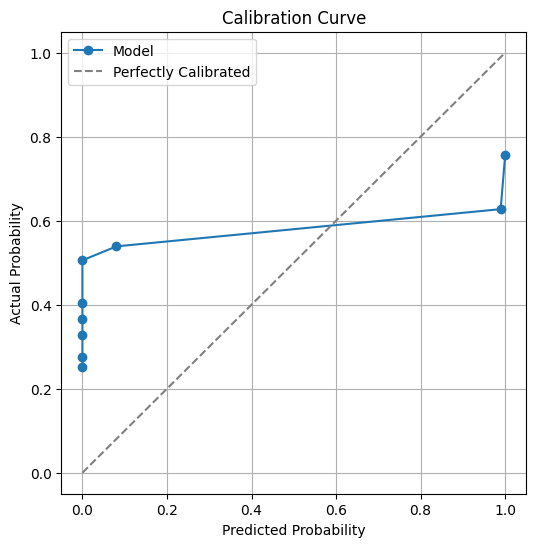

Best Parameters: {'var_smoothing': 1e-05}


In [31]:
from sklearn.naive_bayes import GaussianNB

# Train Naïve Bayes
results['Naive Bayes'], metrics = model_train(GaussianNB(), param_grids['Naive Bayes'], X_train, X_val, y_train, y_val)

# Save the results in the eval_results df
eval_results = pd.concat([eval_results, pd.DataFrame([metrics], index=['Naive Bayes - uncalibrated train'])])
print(f"Best Parameters: {results['Naive Bayes']['best_params']}")


Classification report:
               precision    recall  f1-score   support

           0       0.62      0.84      0.71      4060
           1       0.72      0.44      0.55      3776

    accuracy                           0.65      7836
   macro avg       0.67      0.64      0.63      7836
weighted avg       0.67      0.65      0.63      7836



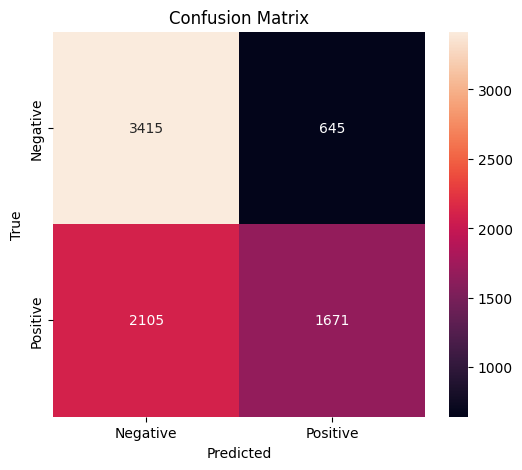

Brier Score Loss: 0.346
AUROC: 0.642
AUPRC: 0.707


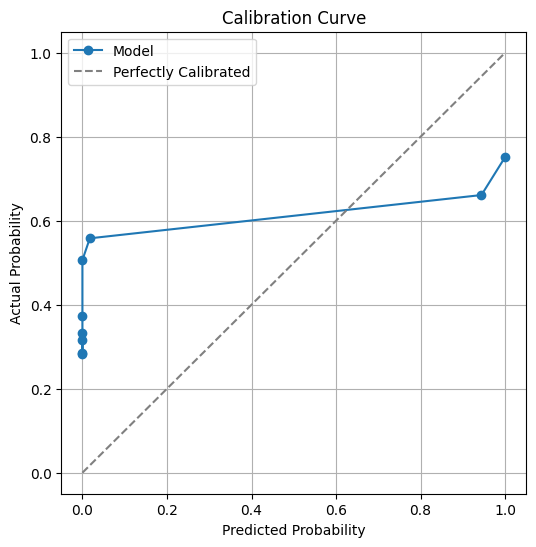

In [32]:
# Test Naïve Bayes performance on test set
nb = results['Naive Bayes']['model']
y_preds_nb = nb.predict(X_test)
y_probs_nb = nb.predict_proba(X_test)[:,1]

# Add results to the eval_results dataframe
metrics_nb = model_evaluation(y_test, y_preds_nb, y_probs_nb)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_nb], index=['Naive Bayes - uncalibrated test'])])


In [33]:
eval_results

,Accuracy,Precision,Recall,F1 Score,Brier Score Loss,AUC (ROC),AUC (PRC),ECE
Logistic Regression - uncalibrated train,0.7026,0.7332,0.5997,0.6598,0.1951,0.6988,0.7636,0.0211
Logistic Regression - uncalibrated test,0.6983,0.7298,0.5938,0.6548,0.1977,0.6947,0.7585,0.0250
Random Forest - uncalibrated train,0.7251,0.7144,0.7133,0.7139,0.1861,0.7246,0.7841,0.0322
Random Forest - uncalibrated test,0.7297,0.7193,0.7201,0.7197,0.1829,0.7294,0.7981,0.0407
XGBoost - uncalibrated train,0.7279,0.7399,0.6692,0.7028,0.1809,0.7257,0.8026,0.0188
XGBoost - uncalibrated test,0.7334,0.7480,0.6737,0.7089,0.1791,0.7313,0.8060,0.0145
AdaBoost - uncalibrated train,0.7010,0.7331,0.5944,0.6565,0.2358,0.6970,0.7651,0.0607
AdaBoost - uncalibrated test,0.7088,0.7393,0.6112,0.6692,0.2358,0.7054,0.7703,0.0679
SVM - uncalibrated train,0.6952,0.7424,0.5607,0.6388,0.1959,0.6902,0.7616,0.0304
SVM - uncalibrated test,0.7088,0.7393,0.6112,0.6692,0.2358,0.7054,0.7703,0.0679


In [34]:
results

{'Logistic Regression': {'model': LogisticRegression(C=100, max_iter=1000, random_state=42),
  'best_params': {'C': 100}},
 'Random Forest': {'model': RandomForestClassifier(min_samples_split=5, n_estimators=1000, random_state=42),
  'best_params': {'max_features': 'sqrt',
   'min_samples_split': 5,
   'n_estimators': 1000}},
 'XGBoost': {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='logloss',
                feature_types=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=0.2, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constr

### Calibration

In [35]:
from sklearn.calibration import CalibratedClassifierCV

#### Logistic Regression Calibration

Classification report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73      4060
           1       0.73      0.60      0.66      3776

    accuracy                           0.70      7836
   macro avg       0.70      0.69      0.69      7836
weighted avg       0.70      0.70      0.70      7836



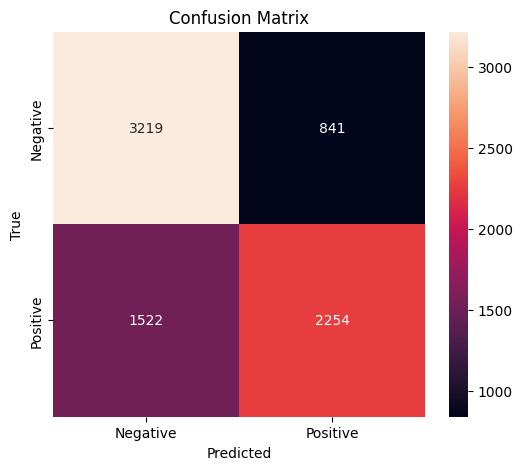

Brier Score Loss: 0.198
AUROC: 0.695
AUPRC: 0.758


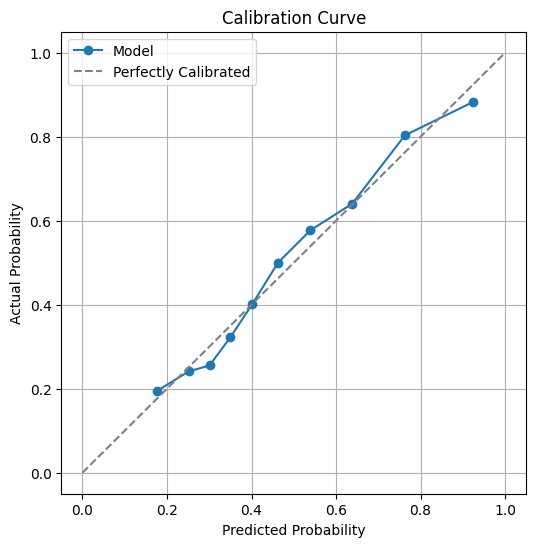

In [36]:
# Calibrate the Logistic Regression 
calibrated_lr = CalibratedClassifierCV(results['Logistic Regression']['model'], method="sigmoid", cv='prefit')  # Platt Scaling
calibrated_lr.fit(X_val, y_val)

y_preds_lr_cal = calibrated_lr.predict(X_test)
y_probs_lr_cal = calibrated_lr.predict_proba(X_test)[:,1]

# Evaluate the calibrated model performance and add the results to the eval_results df
metrics_calibrated_lr = model_evaluation(y_test, y_preds_lr_cal, y_probs_lr_cal)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_calibrated_lr], index=['Logistic Regression - calibrated'])])

Classification report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      4060
           1       0.71      0.73      0.72      3776

    accuracy                           0.73      7836
   macro avg       0.73      0.73      0.73      7836
weighted avg       0.73      0.73      0.73      7836



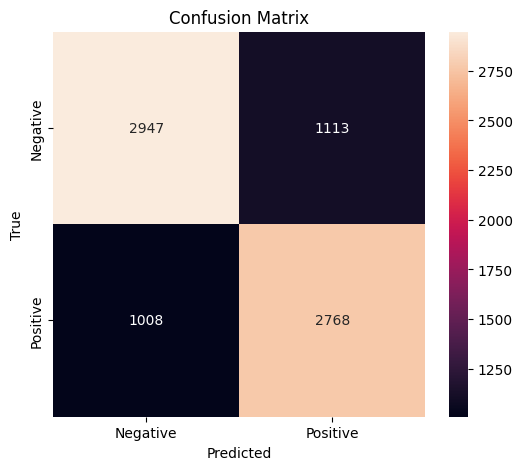

Brier Score Loss: 0.180
AUROC: 0.730
AUPRC: 0.798


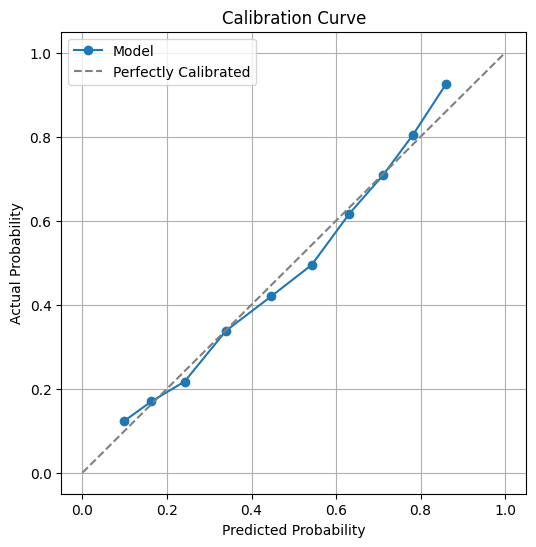

In [37]:
# Calibrate the Random Forest
calibrated_rf = CalibratedClassifierCV(results['Random Forest']['model'], method="sigmoid", cv='prefit')   
calibrated_rf.fit(X_val, y_val)

y_preds_rf_cal = calibrated_rf.predict(X_test)
y_probs_rf_cal = calibrated_rf.predict_proba(X_test)[:,1]

# Evaluate the calibrated model performance and save the results 
metrics_calibrated_rf = model_evaluation(y_test, y_preds_rf_cal, y_probs_rf_cal)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_calibrated_rf], index=['Random Forest - calibrated'])])

Classification report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.75      4060
           1       0.74      0.68      0.71      3776

    accuracy                           0.73      7836
   macro avg       0.73      0.73      0.73      7836
weighted avg       0.73      0.73      0.73      7836



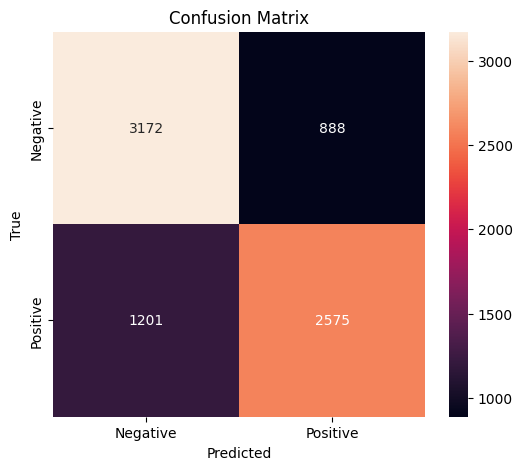

Brier Score Loss: 0.179
AUROC: 0.732
AUPRC: 0.806


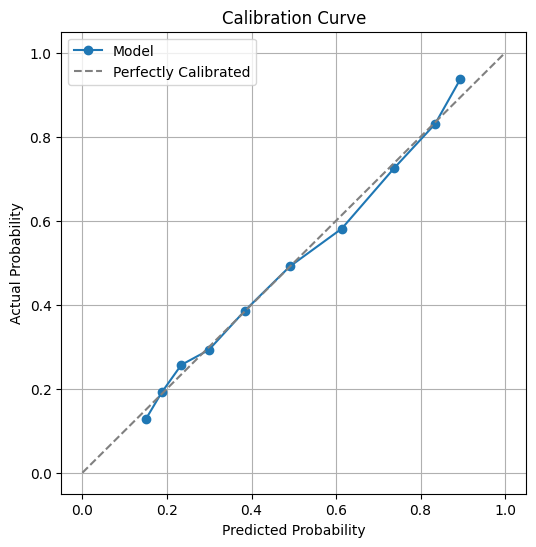

In [38]:
# Calibrate the XGBoost
calibrated_xgb = CalibratedClassifierCV(results['XGBoost']['model'], method="sigmoid", cv='prefit')   
calibrated_xgb.fit(X_val, y_val)

y_preds_xgb_cal = calibrated_xgb.predict(X_test)
y_probs_xgb_cal = calibrated_xgb.predict_proba(X_test)[:,1]

# Evaluate the calibrated XGBoost performance and add the results to the dataframe
metrics_calibrated_xgb = model_evaluation(y_test, y_preds_xgb_cal, y_probs_xgb_cal)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_calibrated_xgb], index=['XGBoost - calibrated'])])

Classification report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      4060
           1       0.74      0.64      0.68      3776

    accuracy                           0.71      7836
   macro avg       0.72      0.71      0.71      7836
weighted avg       0.72      0.71      0.71      7836



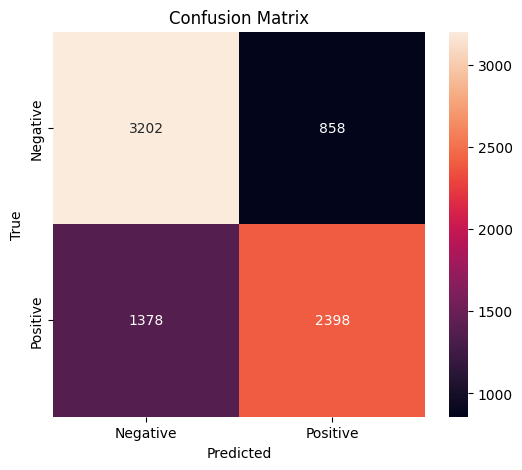

Brier Score Loss: 0.193
AUROC: 0.712
AUPRC: 0.770


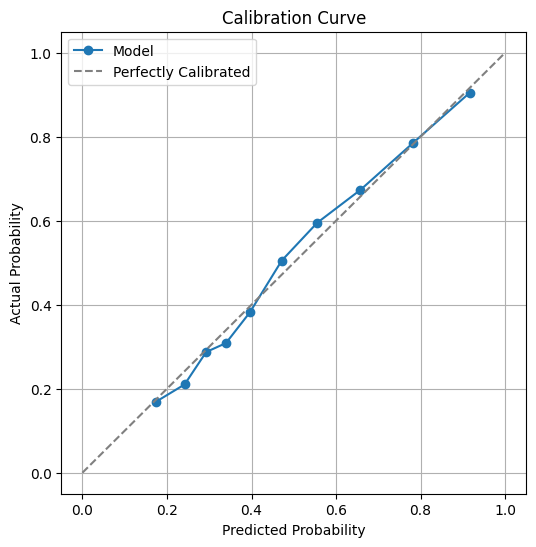

In [39]:
# Calibrate AdaBoost
calibrated_ab = CalibratedClassifierCV(results['AdaBoost']['model'], method="sigmoid", cv='prefit') 
calibrated_ab.fit(X_val, y_val)

y_preds_ab_cal = calibrated_ab.predict(X_test)
y_probs_ab_cal = calibrated_ab.predict_proba(X_test)[:,1]

# Evaluate the calibrated model performance and add the results to the dataframe eval_results
metrics_calibrated_ab = model_evaluation(y_test, y_preds_ab_cal, y_probs_ab_cal)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_calibrated_ab], index=['AdaBoost - calibrated'])])

Classification report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73      4060
           1       0.73      0.60      0.66      3776

    accuracy                           0.70      7836
   macro avg       0.70      0.69      0.69      7836
weighted avg       0.70      0.70      0.69      7836



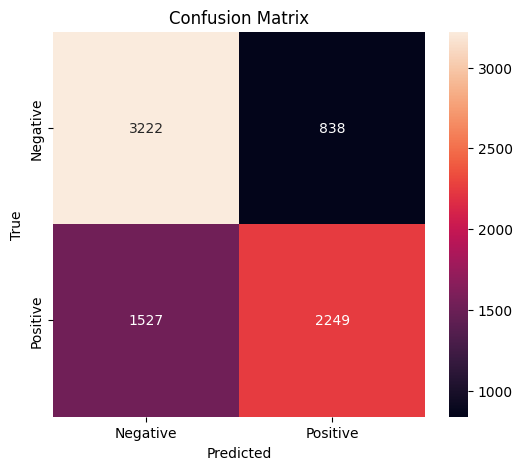

Brier Score Loss: 0.197
AUROC: 0.695
AUPRC: 0.759


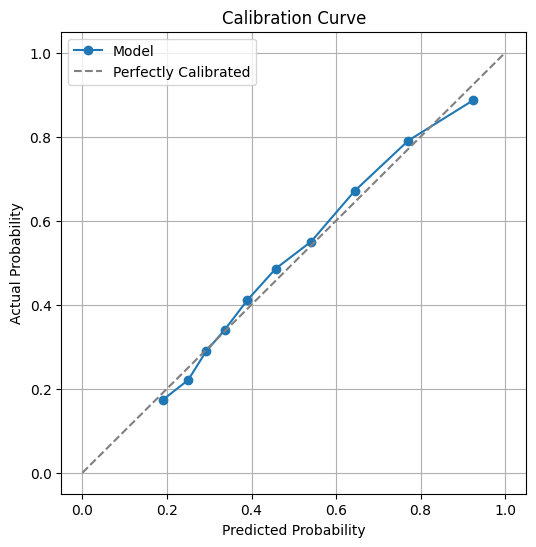

In [40]:
# Calibrate SVC
calibrated_svm = CalibratedClassifierCV(results['Support Vector Machine']['model'], method="sigmoid", cv='prefit')  # Platt Scaling
calibrated_svm.fit(X_val, y_val)

y_preds_svm_cal = calibrated_svm.predict(X_test)
y_probs_svm_cal = calibrated_svm.predict_proba(X_test)[:,1]

# Evaluate the calibrated model's performance and add the results to the eval_results dataframe
metrics_calibrated_svm = model_evaluation(y_test, y_preds_svm_cal, y_probs_svm_cal)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_calibrated_svm], index=['SVM - calibrated'])])

Classification report:
               precision    recall  f1-score   support

           0       0.62      0.84      0.71      4060
           1       0.72      0.45      0.55      3776

    accuracy                           0.65      7836
   macro avg       0.67      0.64      0.63      7836
weighted avg       0.67      0.65      0.64      7836



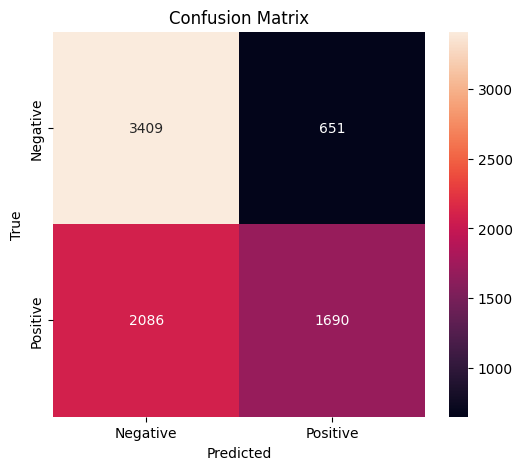

Brier Score Loss: 0.225
AUROC: 0.644
AUPRC: 0.708


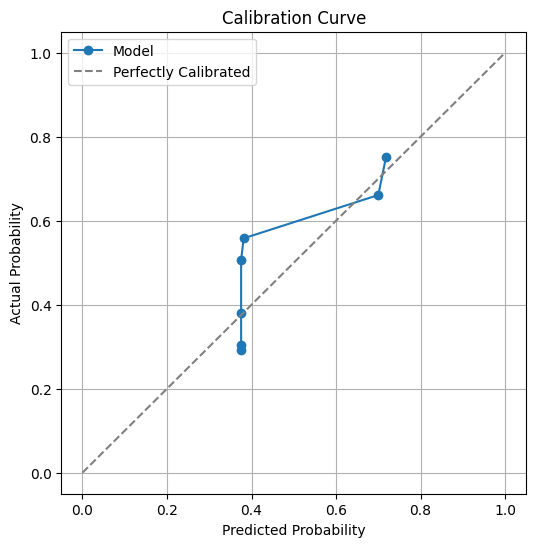

In [41]:
# Calibrate the Naïve Bayes model
calibrated_nb = CalibratedClassifierCV(results['Naive Bayes']['model'], method="sigmoid", cv='prefit')  # Platt Scaling
calibrated_nb.fit(X_val, y_val)

y_preds_nb_cal = calibrated_nb.predict(X_test)
y_probs_nb_cal = calibrated_nb.predict_proba(X_test)[:,1]

# Evaluate the calibrated model performance and add the results to the eval_results df
metrics_calibrated_nb = model_evaluation(y_test, y_preds_nb_cal, y_probs_nb_cal)
eval_results = pd.concat([eval_results, pd.DataFrame([metrics_calibrated_nb], index=['Naive Bayes - calibrated'])])


In [43]:
# Final calibrated results
eval_results

,Accuracy,Precision,Recall,F1 Score,Brier Score Loss,AUC (ROC),AUC (PRC),ECE
Logistic Regression - uncalibrated train,0.7026,0.7332,0.5997,0.6598,0.1951,0.6988,0.7636,0.0211
Logistic Regression - uncalibrated test,0.6983,0.7298,0.5938,0.6548,0.1977,0.6947,0.7585,0.0250
Random Forest - uncalibrated train,0.7251,0.7144,0.7133,0.7139,0.1861,0.7246,0.7841,0.0322
Random Forest - uncalibrated test,0.7297,0.7193,0.7201,0.7197,0.1829,0.7294,0.7981,0.0407
XGBoost - uncalibrated train,0.7279,0.7399,0.6692,0.7028,0.1809,0.7257,0.8026,0.0188
XGBoost - uncalibrated test,0.7334,0.7480,0.6737,0.7089,0.1791,0.7313,0.8060,0.0145
AdaBoost - uncalibrated train,0.7010,0.7331,0.5944,0.6565,0.2358,0.6970,0.7651,0.0607
AdaBoost - uncalibrated test,0.7088,0.7393,0.6112,0.6692,0.2358,0.7054,0.7703,0.0679
SVM - uncalibrated train,0.6952,0.7424,0.5607,0.6388,0.1959,0.6902,0.7616,0.0304
SVM - uncalibrated test,0.7088,0.7393,0.6112,0.6692,0.2358,0.7054,0.7703,0.0679


### Feature Importance

In [44]:
# The best performing model is XGBoost calibrated, so we are going to calculate

In [45]:
rf_base_model = results['Random Forest']['model']
mdi_importance = rf_base_model.feature_importances_

# Create a DataFrame for feature importance
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'MDI': mdi_importance})
top_features = importance_df.sort_values(by='MDI', ascending=False).head(10)
top_features

,Feature,MDI
61,sodium chloride 0.9% flush Sum,0.048864
1,anchor_age,0.044788
2,lengths_of_1st_admission,0.042934
12,bisacodyl Sum,0.026829
46,ondansetron Sum,0.026791
129,sodium chloride 0.9% flush Average,0.026178
23,furosemide Sum,0.024415
91,furosemide Average,0.018644
114,ondansetron Average,0.016972
80,bisacodyl Average,0.016239


In [46]:
import plotly.express as px

# Create the horizontal bar plot
fig = px.bar(
    top_features,
    x='MDI',
    y='Feature',
    orientation='h',
    labels={'MDI': 'Mean Decrease in Impurity (MDI)', 'Feature': 'Feature'},
    title='Top 10 Feature Importance - Random Forest',
    color_discrete_sequence=['skyblue']
)

# Invert y-axis to match Matplotlib's `invert_yaxis()`
fig.update_layout(yaxis=dict(autorange="reversed"))

# Show the figure
fig.show()


In [47]:
# Get the base estimator for XGBoost
xgb_base_model = calibrated_xgb.calibrated_classifiers_[0].estimator

# Get feature importance using "gain" (Mean Decrease in Impurity equivalent for XGBoost)
xgb_importance = xgb_base_model.get_booster().get_score(importance_type='gain')

In [48]:
xgb_importance_df = pd.DataFrame(xgb_importance.items(), columns=['Feature', 'Gain'])
xgb_importance_df = xgb_importance_df.sort_values(by='Gain', ascending=False).head(10)

xgb_importance_df

,Feature,Gain
61,sodium chloride 0.9% flush Sum,47.924015
170,"Outcome of delivery, single liveborn",27.193447
79,bisacodyl Average,20.123520
12,bisacodyl Sum,19.554699
46,ondansetron Sum,18.331858
23,furosemide Sum,16.746956
125,"Acute kidney failure, unspecified",15.951486
64,sw Sum,15.178482
186,"Urinary tract infection, site not specified",13.728477
17,d5 1/2ns Sum,12.464355


In [49]:
import plotly.express as px

# Create the horizontal bar plot
fig = px.bar(
    xgb_importance_df,
    x='Gain',
    y='Feature',
    orientation='h',
    labels={'Gain': 'Feature Importance (Gain)', 'Feature': 'Feature'},
    title='Top 10 Feature Importance - XGBoost',
    color_discrete_sequence=['orange']
)

# Invert y-axis to match Matplotlib's `invert_yaxis()`
fig.update_layout(yaxis=dict(autorange="reversed"))

# Show the figure
fig.show()


# Graphs:

In [61]:
# AUC scores before calibration (test set)

import plotly.express as px
import pandas as pd

# Data for uncalibrated models
titles = [
    "Logistic Regression", "Random Forest", "XGBoost", "AdaBoost", "Support Vector Machine", "Naive Bayes"
]
auc_tes1t = [0.6947, 0.7294, 0.7313, 0.7054, 0.7054, 0.6418]

# Create DataFrame
df111= pd.DataFrame({
    "Model": titles ,
    "AUC (ROC)": auc_tes1t,
    "Dataset": ["Test"] * len(titles)
})

# Create bar plot
fig = px.bar(df111, x="Model", y="AUC (ROC)", color="Dataset", 
             barmode="group", title="AUC (ROC) Scores for Uncalibrated Models")
fig.update_traces(text=df111["AUC (ROC)"].round(4), textposition='outside')
fig.update_layout(yaxis=dict(range=[0, 1]))
fig.update_layout(bargap=0.6)
fig.show()





In [66]:
import plotly.graph_objects as go
from sklearn.calibration import calibration_curve

# Compute calibration curves
prob_true, prob_pred = calibration_curve(y_test, y_probs_xgb, n_bins=10, strategy='quantile')
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_probs_xgb_cal, n_bins=10, strategy='quantile')

# Create figure
fig = go.Figure()

# Uncalibrated model
fig.add_trace(go.Scatter(x=prob_pred, y=prob_true, 
                         mode='lines+markers', 
                         line=dict(width=1, color='blue'), 
                         marker=dict(size=8),
                         name="Uncalibrated Model"))

# Calibrated model
fig.add_trace(go.Scatter(x=prob_pred_cal, y=prob_true_cal, 
                         mode='lines+markers', 
                         line=dict(width=1, color='red'), 
                         marker=dict(size=8),
                         name="Calibrated Model"))

# Perfectly calibrated line
fig.add_trace(go.Scatter(x=[0,1], y=[0,1], 
                         mode='lines', 
                         line=dict(dash='dash', width=1, color='black'), 
                         name="Perfectly Calibrated"))

# Layout adjustments
fig.update_layout(title="Calibration Curve",
                  xaxis_title="Predicted Probability",
                  yaxis_title="Actual Probability",
                  width=800, height=800,  # Bigger figure
                  legend=dict(x=0.02, y=0.98),
                  template="plotly_white")

fig.show()

